In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
import meta.conf_train as conf_train
import matplotlib
import matplotlib.dates as mdates
import matplotlib.axes as ax
import meta.conf_nilm as conf_nilm

MOVING_AVG_DIST = 10
COLORS = {'rnn':'#17becf', 'rnn_e':'#ff7f0e', 'adam':'#2ca02c', 'sgd':'pink', 'momentum':'lightgray', 
          'adagrad':'#8c564b', 'adadelta':'#bcbd22', 'rmsprop':'#1f77b4', 'dm':'#7f7f7f', 'dm_e':'#9467bd', 'dm_i':'#d62728'}
NAMES = {'rnn':'RNNprop', 'rnn_e':'RNNprop (enhanced)', 'adam':'Adam', 'sgd':'SGD', 'momentum':'Momentum', 
          'adagrad':'Adagrad', 'adadelta':'Adadelta', 'rmsprop':'RMSProp', 
         'dm':'DM', 'dm_e':'DM (enhanced)', 'dm_i':'DM (imitation)'}


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

def _plot_results_avg(results, error_bars=False, title='', name=''):
    
    plt.figure(figsize=(21, 9))
    plt.ylim(0, 1.5)
    if error_bars:
        for n, r in results.items(): 
            average = np.mean(r, axis=0)
            error = np.std(r, axis=0)
            maxs = np.convolve(average + error, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
            mins = np.convolve(average - error, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
            average = np.convolve(average, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
            yerr = np.convolve(error, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')

            plt.errorbar(range(len(maxs)), average, yerr=yerr, alpha=0.1,  color=COLORS[n])
    #         plt.fill_between(range(len(maxs)), mins, maxs, alpha=0.5, color=COLORS[n])
            plt.plot(mins, linestyle='dotted', linewidth='1', alpha=0.2, color=COLORS[n])
            plt.plot(maxs, linestyle='dotted', linewidth='1', alpha=0.2, color=COLORS[n])
    #         plt.plot(average, label=n, linewidth='2')
    for n, r in results.items(): 
        average = np.mean(r, axis=0)
        average = np.convolve(average, np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid')
        plt.plot(average, label=NAMES[n], linewidth='2', color=COLORS[n])
    plt.legend()
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.title(title)
    plt.savefig('plots/' + name + "_avg.svg")
    plt.show()
    
    
def _plot_first_run(results):
    plt.figure(figsize=(21, 9))
    for n, r in results.items(): 
        plt.plot(np.convolve(r[1], np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid'), label=NAMES[n], linewidth='1.5', color=COLORS[n])
#             plt.plot(r[i], label=n, linewidth='2')
        plt.ylim(0, 1.2)
    plt.legend()
    plt.title('L2O Optimizers')
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.savefig('plots/' + "single.svg")
    plt.show()
    
def _plot_single_results_avg(results, title='', name=''):
    
    plt.figure(figsize=(21, 16))
    for n, r in results.items(): 
        for i in range(len(r)):
#             plt.ylabel('Loss')
#             plt.xlabel('Steps')
            plt.subplot(3, 3, i+1)
            plt.title('Run #'+ str(i+1))
            plt.plot(np.convolve(r[i], np.ones(MOVING_AVG_DIST)/MOVING_AVG_DIST, mode='valid'), label=NAMES[n], linewidth='1.5', color=COLORS[n])
#             plt.plot(r[i], label=n, linewidth='2')
            plt.ylim(0, 1.2)
    plt.legend()
#     plt.title(title)
    plt.savefig('plots/' + name + "_singles.svg")
    plt.show()
    
def _plot_validation_results(results):
    plt.figure(figsize=(10, 9))
    plt.xlabel('Validation Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1.2)
    for n, r in results.items(): 
        plt.plot(r, label=NAMES[n], linewidth='2')
    plt.legend()
    plt.show()
    


In [15]:
results = {
# ---------------- BATCH ---------------- #
#         'sgd': pd.read_pickle('meta/results/1_eval_final/batch/fridge/sgd_eval_loss_record.pickle-nilm_seq'),
#         'momentum': pd.read_pickle('meta/results/1_eval_final/batch/fridge/momentum_eval_loss_record.pickle-nilm_seq'),
#         'adagrad': pd.read_pickle('meta/results/1_eval_final/batch/fridge/adagrad_eval_loss_record.pickle-nilm_seq'),
#         'adadelta': pd.read_pickle('meta/results/1_eval_final/batch/fridge/adadelta_eval_loss_record.pickle-nilm_seq'),
#         'rmsprop': pd.read_pickle('meta/results/1_eval_final/batch/fridge/rmsprop_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/batch/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
#         'rnn': pd.read_pickle('meta/results/1_eval_final/batch/fridge/rnn_base_b_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/batch/fridge/rnn_e_base_b_eval_loss_record.pickle-nilm_seq'),
#         'dm': pd.read_pickle('meta/results/1_eval_final/batch/fridge/dm_base_b_eval_loss_record.pickle-nilm_seq'),
#         'dm_e': pd.read_pickle('meta/results/1_eval_final/batch/fridge/dm_e_base_b_eval_loss_record.pickle-nilm_seq'),
#         'dm_i': pd.read_pickle('meta/results/1_eval_final/batch/fridge/dm_i_base_b_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/batch/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
    
# ---------------- NO BATCH ---------------- #
#         'sgd': pd.read_pickle('meta/results/1_eval_final/opt/fridge/sgd_eval_loss_record.pickle-nilm_seq'),
#         'momentum': pd.read_pickle('meta/results/1_eval_final/opt/fridge/momentum_eval_loss_record.pickle-nilm_seq'),
#         'adagrad': pd.read_pickle('meta/results/1_eval_final/opt/fridge/adagrad_eval_loss_record.pickle-nilm_seq'),
#         'adadelta': pd.read_pickle('meta/results/1_eval_final/opt/fridge/adadelta_eval_loss_record.pickle-nilm_seq'),
#         'rmsprop': pd.read_pickle('meta/results/1_eval_final/opt/fridge/rmsprop_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/opt/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
    # Initial runs
#         'rnn': pd.read_pickle('meta/results/1_eval_final/fridge/rnn_base_final.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/fridge/rnn_e_base_final.pickle-nilm_seq'),
#         'dm': pd.read_pickle('meta/results/1_eval_final/fridge/dm_base_eval_loss_record.pickle-nilm_seq'),
#         'dm_e': pd.read_pickle('meta/results/1_eval_final/fridge/dm_e_base_eval_loss_record.pickle-nilm_seq'),
    
    # Detailed Loss Analysis
        'rnn': pd.read_pickle('meta/results/1_eval_final/fridge/rnn_base_final.pickle-nilm_seq'),
        'rnn_e': pd.read_pickle('meta/results/1_eval_final/fridge/rnn_e_base_final.pickle-nilm_seq'),
        'adam': pd.read_pickle('meta/results/1_eval_final/fridge/adam_base_final.pickle-nilm_seq'),
    
# ---------------- TASK VARIATION ---------------- #
    # BASE REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/base/fridge/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/base/fridge/rnn_e_base_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/base/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # APPL REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/appls/fridge/rnn_appls_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/appls/fridge/rnn_e_appls_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/appls/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # DATA REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/data/fridge/rnn_data_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/data/fridge/rnn_e_data_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/data/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    # BOTH REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/both/fridge/rnn_both_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/both/fridge/rnn_e_both_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/both/fridge/adam_eval_loss_record.pickle-nilm_seq'),
    
    
    
    # BASE iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/base_iAWE/fridge/rnn_base_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/base_iAWE/fridge/rnn_e_base_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/base_iAWE/fridge/adam_full.pickle-nilm_seq'),
    # APPL iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/fridge/rnn_appls_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/fridge/rnn_e_appls_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/fridge/adam_full.pickle-nilm_seq'),
    # DATA iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/data_iAWE/fridge/rnn_data_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/data_iAWE/fridge/rnn_e_data_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/data_iAWE/fridge/adam_full.pickle-nilm_seq'),
    # BOTH iAWE fridge
#         'rnn': pd.read_pickle('meta/results/1_eval_final/both_iAWE/fridge/rnn_both_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/both_iAWE/fridge/rnn_e_both_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/both_iAWE/fridge/adam_full.pickle-nilm_seq'),
    
    
    # BASE iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/base_iAWE/air conditioner/rnn_base_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/base_iAWE/air conditioner/rnn_e_base_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/base_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    # APPL iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/air conditioner/rnn_appls_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/air conditioner/rnn_e_appls_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/appls_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    # DATA iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/data_iAWE/air conditioner/rnn_data_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/data_iAWE/air conditioner/rnn_e_data_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/data_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    # BOTH iAWE AC
#         'rnn': pd.read_pickle('meta/results/1_eval_final/both_iAWE/air conditioner/rnn_both_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/both_iAWE/air conditioner/rnn_e_both_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/both_iAWE/air conditioner/adam_full.pickle-nilm_seq'),
    
    
        # ---------------- OTHER ---------------- #
    # LONG REDD FRIDGE
#         'rnn': pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/rnn_base_full.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/rnn_e_base_full.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/long_redd/fridge/adam_full.pickle-nilm_seq'),
    # DISH WASHER
#         'rnn': pd.read_pickle('meta/results/1_eval_final/dish/dish washer/rnn_base_eval_loss_record.pickle-nilm_seq'),
#         'rnn_e': pd.read_pickle('meta/results/1_eval_final/dish/dish washer/rnn_e_base_eval_loss_record.pickle-nilm_seq'),
#         'adam': pd.read_pickle('meta/results/1_eval_final/dish/dish washer/adam_eval_loss_record.pickle-nilm_seq'),
}
for n, r in results.items():
    print(len(r))

1
1
1
1
1
1


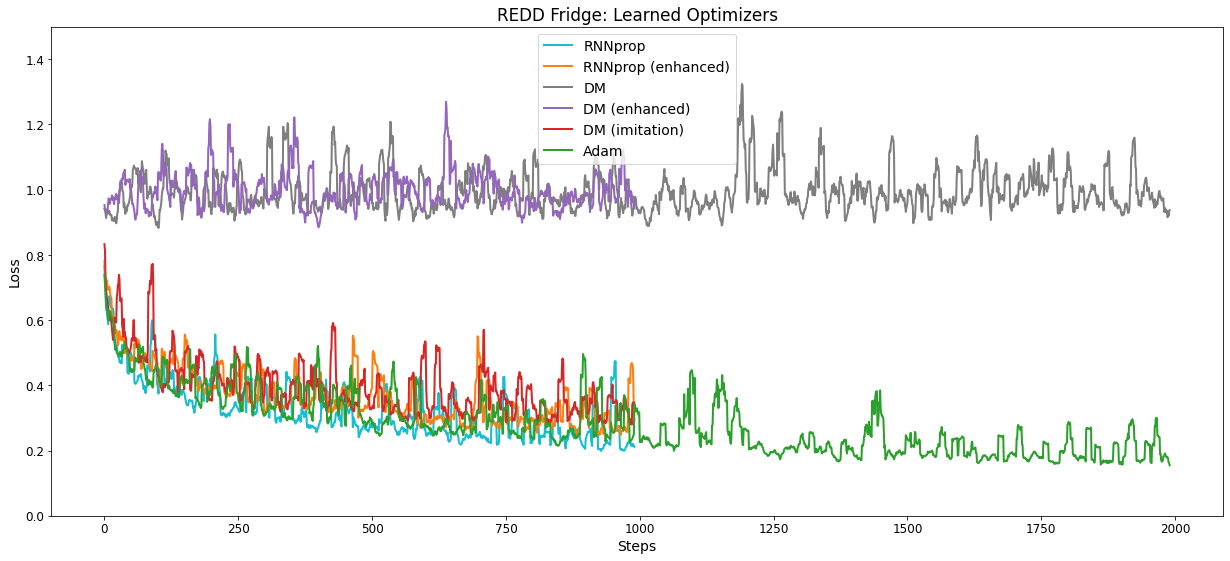

In [16]:
_plot_results_avg(results, error_bars=True, name='test', title='REDD Fridge: Learned Optimizers') 
# _plot_single_results_avg(results, name='test')
# _plot_first_run(results)

In [ ]:

    
def _make_nilm_subplots(results):
    font = {'family' : 'normal',
        'size'   : 12}
    matplotlib.rc('font', **font)
    myFmt = mdates.DateFormatter('%d.')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    plt.figure(figsize=(36, 6))
    i = 1
    for opt, data in results.items():
        plt.subplot(1, 3, i)
        plt.title(opt)
        for label, values in data.items():
            plt.plot(values[conf_nilm.DISPLAY_DETAIL_TIME['start_time'] : conf_nilm.DISPLAY_DETAIL_TIME['end_time']], label=label)
        plt.ylim(0, 1000)
        i += 1
    plt.xlabel('Time')
    plt.ylabel('Power (W)')
    plt.legend()
    plt.show()
        
    
    
def _make_nilm_plots(data, name):
    font = {'family' : 'normal',
        'size'   : 16}
    matplotlib.rc('font', **font)
    myFmt = mdates.DateFormatter('%d')
    plt.gca().xaxis.set_major_formatter(myFmt)
    
    plt.figure(figsize=(100, 12))
    for label, values in data.items():
        plt.plot(values, label=label)
    plt.title(NAMES[name])
    plt.legend(fontsize=40)
    plt.ylim(0, 1500)
    plt.xlabel('Time', fontsize=40)
    plt.ylabel('Power (W)', fontsize=40)
    plt.savefig(conf_nilm.OUTPUT_PATH + name + '.png')
    plt.show()

    plt.figure(figsize=(12, 6))
    for label, values in data.items():
        plt.plot(values[conf_nilm.DISPLAY_DETAIL_TIME['start_time'] : conf_nilm.DISPLAY_DETAIL_TIME['end_time']], label=label)
    plt.title(NAMES[name])
    plt.legend()
    plt.ylim(0, 1200)
    plt.xlabel('Time')
    plt.ylabel('Power (W)')
    plt.show()

In [10]:
nilm_results = {
         'rnn': pd.read_pickle('meta/results/2_nilm/fridge/rnn_base_fridge_nilm_results.pickle'),
        'rnn_e': pd.read_pickle('meta/results/2_nilm/fridge/rnn_e_base_nb2_fridge_nilm_results.pickle'),
        'adam': pd.read_pickle('meta/results/2_nilm/fridge/adam_fridge_nilm_results.pickle'),
}

FileNotFoundError: [Errno 2] No such file or directory: 'meta/results/2_nilm/fridge/rnn_base_fridge_nilm_results.pickle'

In [3]:
_make_nilm_subplots(nilm_results)

3
1
1
3
3
